# Final Exam submission : 

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

In [891]:
# importing all ther required libraries for building a model and validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc,precision_score,recall_score
import warnings

In [892]:
# importing the dataframe for final exam
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\schulich_ds1-main\Datasets\heart_failure_clinical_records_dataset.csv")

Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.

In [893]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
101,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
203,60.0,0,59,0,25,1,212000.00,3.50,136,1,1,187,0
270,44.0,0,582,1,30,1,263358.03,1.60,130,1,1,244,0
81,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
187,60.0,0,1896,1,25,0,365000.00,2.10,144,0,0,172,1


In [894]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [895]:
# df.drop(columns=['Id', 'var1'], inplace=True)

renaming columns

In [896]:
df.columns = ['age', 'ana', 'c_pho', 'diab','e_fract', 'hbp', 'plat','s_c', 's_s', 'sex', 'smok', 'time','DEATH']

In [897]:
df.columns

Index(['age', 'ana', 'c_pho', 'diab', 'e_fract', 'hbp', 'plat', 's_c', 's_s',
       'sex', 'smok', 'time', 'DEATH'],
      dtype='object')

In [898]:
df.nunique()

age         47
ana          2
c_pho      208
diab         2
e_fract     17
hbp          2
plat       176
s_c         40
s_s         27
sex          2
smok         2
time       148
DEATH        2
dtype: int64

In [899]:
df.head(5)

,age,ana,c_pho,diab,e_fract,hbp,plat,s_c,s_s,sex,smok,time,DEATH
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [900]:
df.sample(5)

,age,ana,c_pho,diab,e_fract,hbp,plat,s_c,s_s,sex,smok,time,DEATH
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
208,60.0,1,2281,1,40,0,283000.00,1.0,141,0,0,187,0
141,46.0,1,291,0,35,0,348000.00,0.9,140,0,0,109,0
234,53.0,1,582,0,45,0,305000.00,1.1,137,1,1,209,0
236,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0


In [901]:
df.tail(5)

,age,ana,c_pho,diab,e_fract,hbp,plat,s_c,s_s,sex,smok,time,DEATH
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [902]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
ana,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
c_pho,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diab,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
e_fract,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
hbp,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
plat,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
s_c,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
s_s,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


from the above : all have medium hence they are all integers but need to check if the continuous or catagorical<br>
'age' mean and mediun and almost in the same place.<br>
'ana'- is binary<br>
 'c_pho' - max value is too high<br>
 'diab' - is binary<br>
 'e_fract' - mean and median are close together<br>
 'hbp' - is binary<br>
 'plat' - need to analyse more<br>
 's_c' - mean and median are normally distributed<br>
 's_s' - mean and median are normally distributed<br>
 'sex' - is binary male / female<br>
 'smok' - is binary yes/no<br>
 'time' - time of death<br>
 'DEATH' - our target variable is binary which is good<br>
<br>
can you see outliers ? what do you understand from 50% and mean.<br>
list variables which are catagorical.<br>
<br>
which variables are continuous.<br>

In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      299 non-null    float64
 1   ana      299 non-null    int64  
 2   c_pho    299 non-null    int64  
 3   diab     299 non-null    int64  
 4   e_fract  299 non-null    int64  
 5   hbp      299 non-null    int64  
 6   plat     299 non-null    float64
 7   s_c      299 non-null    float64
 8   s_s      299 non-null    int64  
 9   sex      299 non-null    int64  
 10  smok     299 non-null    int64  
 11  time     299 non-null    int64  
 12  DEATH    299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


missing values:

we can see that the total data is around 1050 in Sate date but every other value is missing few details.

Total count of null are less than 10% hence droping the Values

In [904]:
# df['var'] = df['var'].astype('int')

In [905]:
# df.isnull().sum()

In [906]:
# fillna()
# avarange , mediam based on catigory. Assignment 3. 
# should not have drastic difference in values.

In [907]:
# df.dropna(inplace=True) * need to check for null

In [908]:
df.duplicated().sum()

0

In [909]:
df.drop_duplicates(inplace=True)

Prepare data for modelling (i.e., data cleaning and feature engineering).

In [910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      299 non-null    float64
 1   ana      299 non-null    int64  
 2   c_pho    299 non-null    int64  
 3   diab     299 non-null    int64  
 4   e_fract  299 non-null    int64  
 5   hbp      299 non-null    int64  
 6   plat     299 non-null    float64
 7   s_c      299 non-null    float64
 8   s_s      299 non-null    int64  
 9   sex      299 non-null    int64  
 10  smok     299 non-null    int64  
 11  time     299 non-null    int64  
 12  DEATH    299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


one hot encoding

In [911]:
# sex = pd.get_dummies(df['Sex'],dtype=int)
# pd.concat([df,sex],axis=1)
# df.drop(['Sex'],axis=1,inplace=True)

In [912]:
df['DEATH'].unique()

array([1, 0], dtype=int64)

In [913]:
# df['DEATH'] = df['DEATH'].map({'Abnormal':1, 'Normal':0})

In [914]:
# univariate analysis - first we check the output variable and make sure it's balanced
df.groupby('DEATH').count()

,age,ana,c_pho,diab,e_fract,hbp,plat,s_c,s_s,sex,smok,time
DEATH,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [915]:
# ratio is
96*100 / (203+96)

32.10702341137124

thats decently balanced dataset. so planning to skip smote

In [916]:
# Y = Y.astype('int')
# X_balance,Y_balance = SMOTE().fit_sample(X,Y)
# X_balance = pd.DataFrame(X_balance, columns = X.columns)

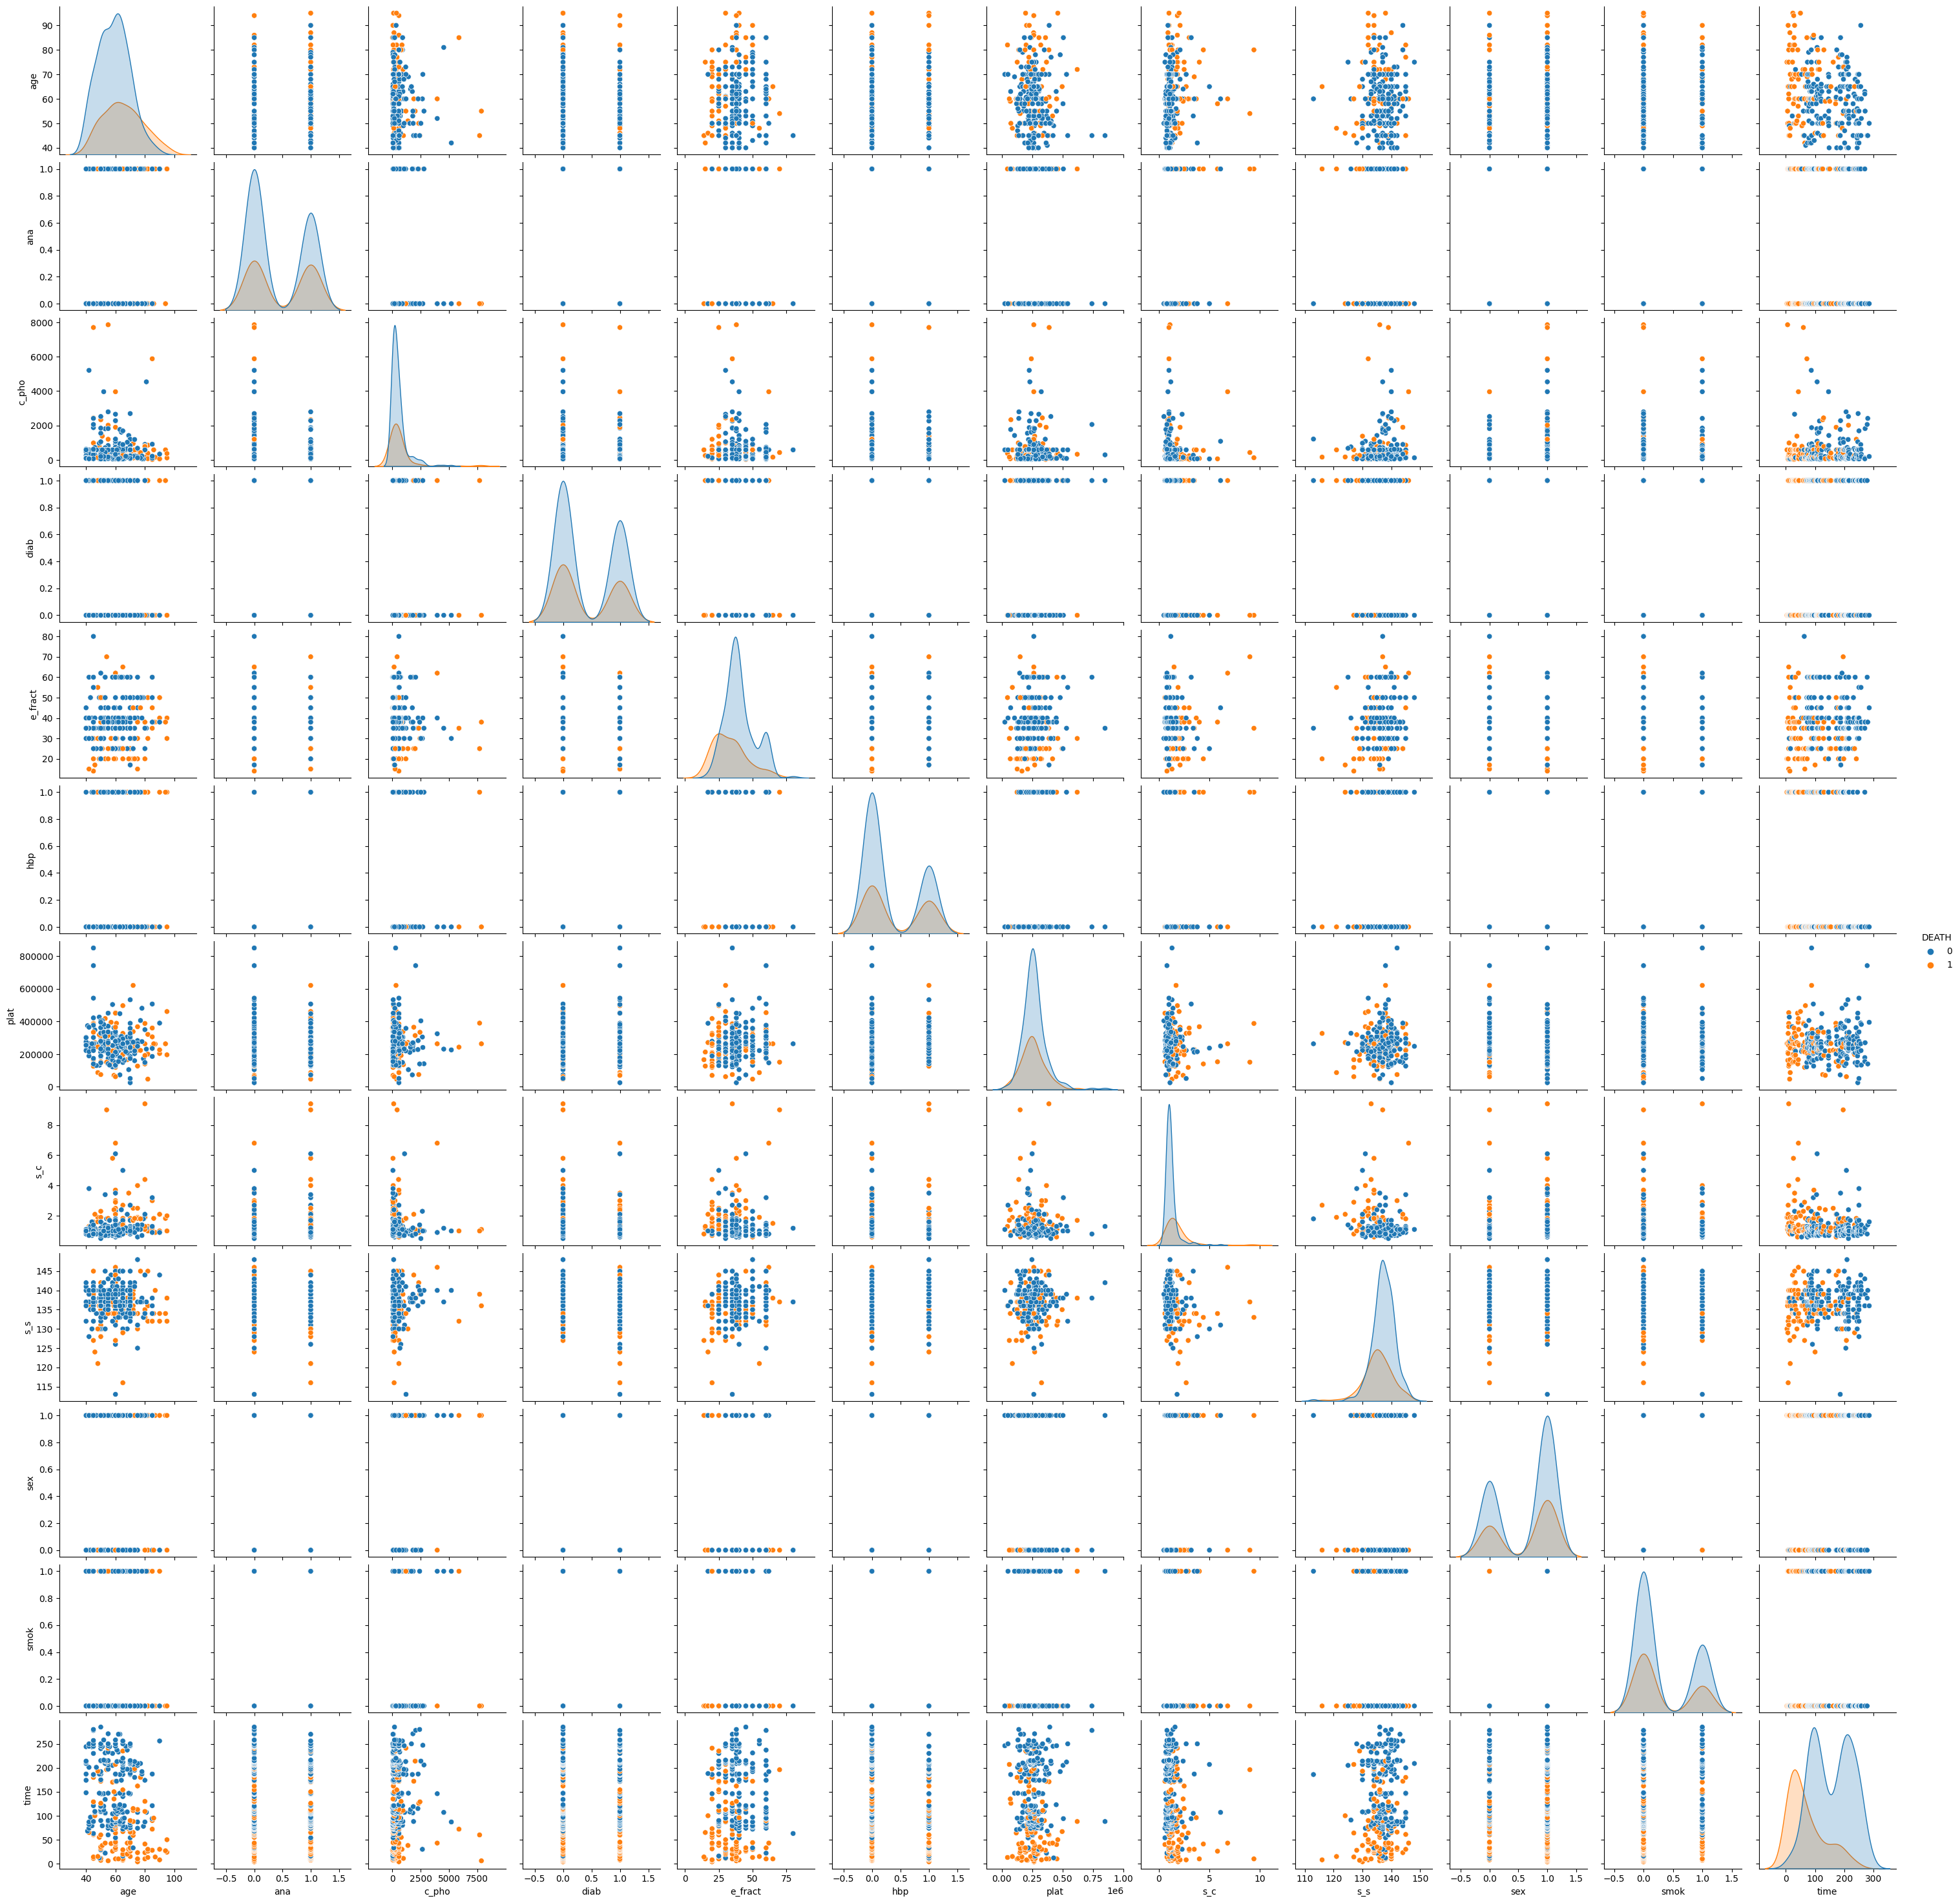

In [917]:
sns.pairplot(df,hue = 'DEATH')

In [918]:
df.columns

Index(['age', 'ana', 'c_pho', 'diab', 'e_fract', 'hbp', 'plat', 's_c', 's_s',
       'sex', 'smok', 'time', 'DEATH'],
      dtype='object')

In [919]:
df.nunique()

age         47
ana          2
c_pho      208
diab         2
e_fract     17
hbp          2
plat       176
s_c         40
s_s         27
sex          2
smok         2
time       148
DEATH        2
dtype: int64

In [920]:
df.groupby(['diab', 'DEATH']).size().unstack() / df.groupby('DEATH').size()

DEATH,0,1
diab,,
0,0.581281,0.583333
1,0.418719,0.416667


no difference

In [921]:
df.groupby(['ana','DEATH']).size().unstack() / df.groupby('DEATH').size()

DEATH,0,1
ana,,
0,0.591133,0.520833
1,0.408867,0.479167


ver little difference in values

In [922]:
df.groupby(['hbp','DEATH']).size().unstack() / df.groupby('DEATH').size()

DEATH,0,1
hbp,,
0,0.674877,0.59375
1,0.325123,0.40625


minor increse in vales for death with high blood pressure

In [923]:
df.groupby(['sex','DEATH']).size().unstack() / df.groupby('DEATH').size()

DEATH,0,1
sex,,
0,0.349754,0.354167
1,0.650246,0.645833


In [924]:
df.groupby(['smok','DEATH']).size().unstack() / df.groupby('DEATH').size()

DEATH,0,1
smok,,
0,0.674877,0.6875
1,0.325123,0.3125


show smoking is not related to death

<Axes: xlabel='s_c', ylabel='Count'>

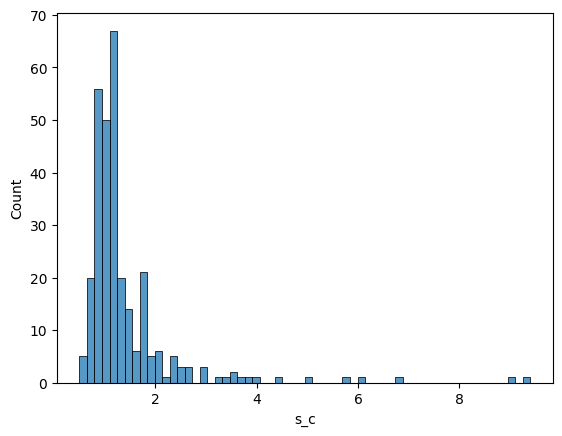

In [925]:
sns.histplot(df['s_c'])

In [926]:
df.drop(df[df['s_c']>8].index, axis=0,inplace=True)

<Axes: xlabel='s_c', ylabel='Count'>

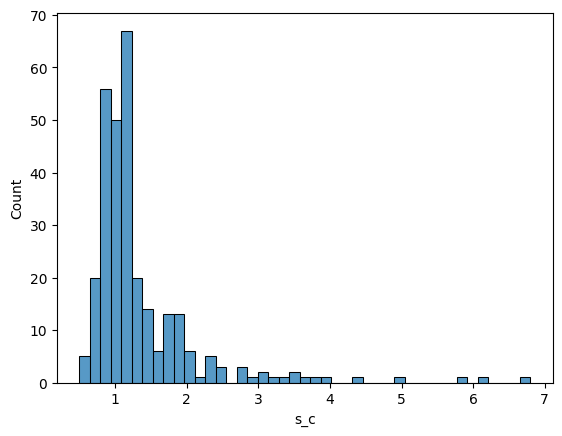

In [927]:
sns.histplot(df['s_c'])

In [928]:
df['s_c']=np.log(df['s_c'])

<Axes: xlabel='s_c', ylabel='Count'>

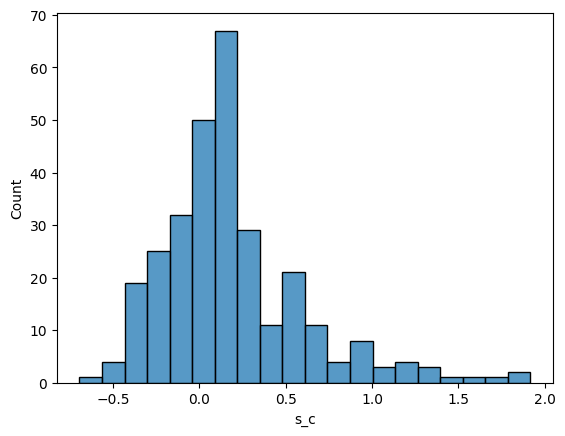

In [929]:
sns.histplot(df['s_c'])

for continuous variables: plot the boxplots with the x-axis as the output variable, and y-axis as the continuous variable 

In [930]:
df.nunique()

age         47
ana          2
c_pho      206
diab         2
e_fract     16
hbp          2
plat       174
s_c         38
s_s         27
sex          2
smok         2
time       148
DEATH        2
dtype: int64

In [931]:
df.columns

Index(['age', 'ana', 'c_pho', 'diab', 'e_fract', 'hbp', 'plat', 's_c', 's_s',
       'sex', 'smok', 'time', 'DEATH'],
      dtype='object')

<Axes: xlabel='DEATH', ylabel='plat'>

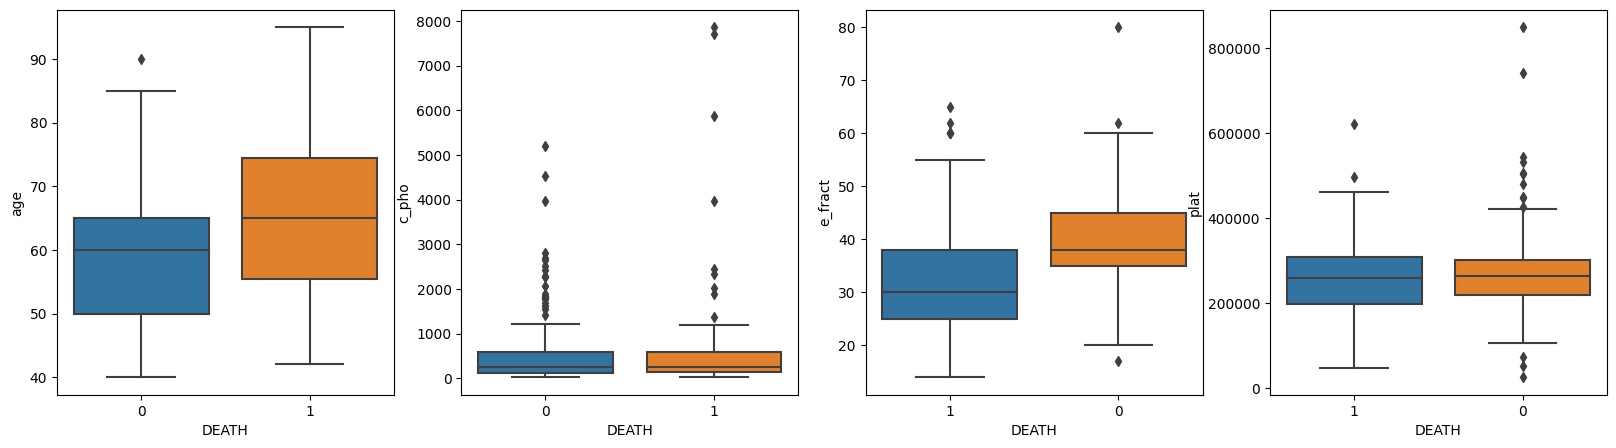

In [932]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(x='DEATH', y='age', data=df, order=df.groupby('DEATH')['age'].median().sort_values().index, ax=ax1)
sns.boxplot(x='DEATH', y='c_pho', data=df, order=df.groupby('DEATH')['c_pho'].median().sort_values().index, ax=ax2)
sns.boxplot(x='DEATH', y='e_fract', data=df, order=df.groupby('DEATH')['e_fract'].median().sort_values().index, ax=ax3)
sns.boxplot(x='DEATH', y='plat', data=df, order=df.groupby('DEATH')['plat'].median().sort_values().index, ax=ax4)

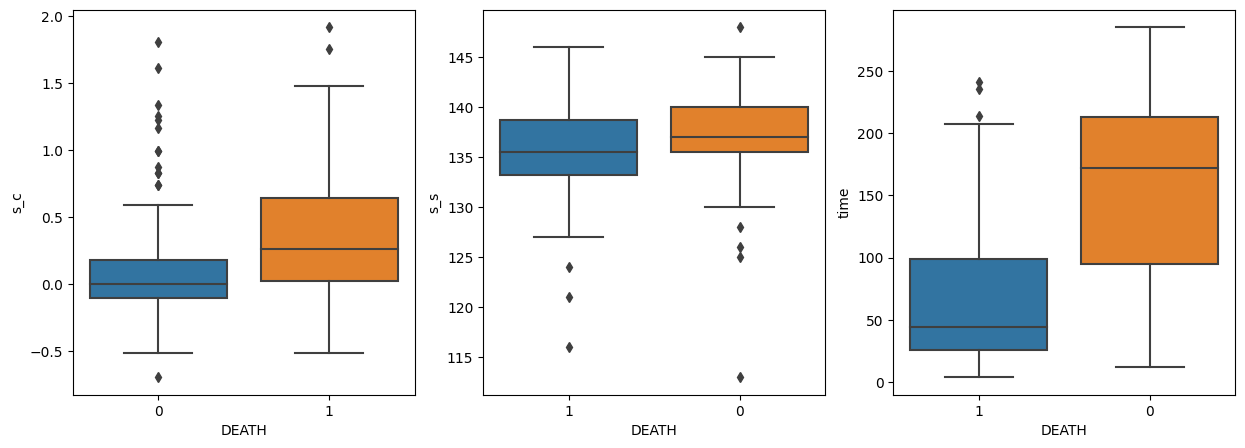

In [933]:
fig, (ax5, ax6, ax7) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='DEATH', y='s_c', data=df, order=df.groupby('DEATH')['s_c'].median().sort_values().index, ax=ax5)
sns.boxplot(x='DEATH', y='s_s', data=df, order=df.groupby('DEATH')['s_s'].median().sort_values().index, ax=ax6)
sns.boxplot(x='DEATH', y='time', data=df, order=df.groupby('DEATH')['time'].median().sort_values().index, ax=ax7)

plt.show()

above : are the variables meaning full for analysis

catagorical variable : 

above : do they show difference in the output ?

In [934]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,60.792370,11.876108,40.000000,51.000000,60.00000,70.000000,95.000000
ana,297.0,0.427609,0.495567,0.000000,0.000000,0.00000,1.000000,1.000000
c_pho,297.0,583.905724,973.151188,23.000000,115.000000,250.00000,582.000000,7861.000000
diab,297.0,0.420875,0.494533,0.000000,0.000000,0.00000,1.000000,1.000000
e_fract,297.0,37.986532,11.727184,14.000000,30.000000,38.00000,45.000000,80.000000
hbp,297.0,0.346801,0.476755,0.000000,0.000000,0.00000,1.000000,1.000000
plat,297.0,263316.669192,97648.169321,25100.000000,213000.000000,262000.00000,303000.000000,850000.000000
s_c,297.0,0.184982,0.422995,-0.693147,-0.105361,0.09531,0.336472,1.916923
s_s,297.0,136.636364,4.422274,113.000000,134.000000,137.00000,140.000000,148.000000
sex,297.0,0.649832,0.477828,0.000000,0.000000,1.00000,1.000000,1.000000


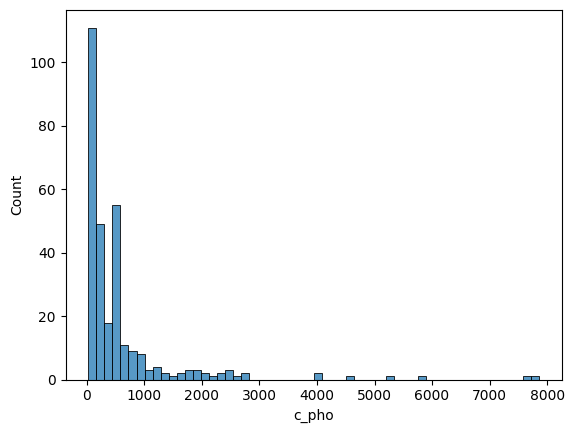

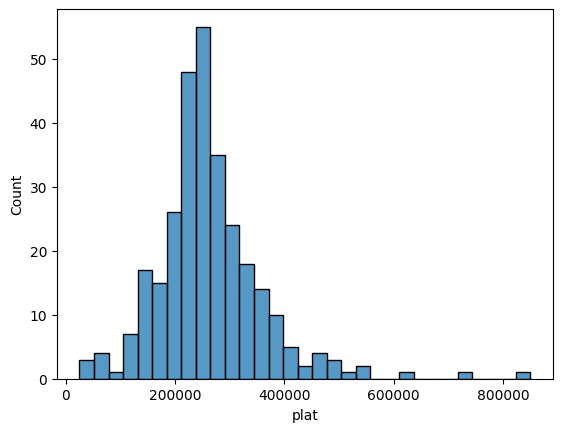

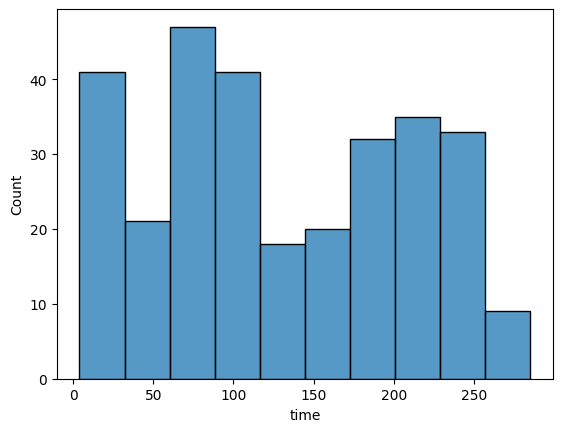

In [935]:
sns.histplot(df['c_pho'])
plt.show()
sns.histplot(df['plat'])
plt.show()
sns.histplot(df['time'])
plt.show()

In [936]:
df.drop(df[df['c_pho'] > 3000].index, axis=0, inplace=True)

In [937]:
df['c_pho'] = np.log(df['c_pho'])

feature selection 

In [938]:
# check hoe PCA can be used again.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

Cumulative explained variance ratio: [0.16573827 0.29062497 0.40154397 0.48735264 0.56612096 0.64243551
 0.71069182 0.77601945 0.83301214 0.88872262 0.93257482 0.97168468
 1.        ]


In [939]:
dc = df.corr()
dc['DEATH'].sort_values(ascending=False).index

Index(['DEATH', 's_c', 'age', 'ana', 'hbp', 'sex', 'diab', 'c_pho', 'smok',
       'plat', 's_s', 'e_fract', 'time'],
      dtype='object')

In [940]:
dc.drop('DEATH',axis=1,inplace=True)
dc.drop('DEATH',axis=0,inplace=True)
dc.replace(1, 0, inplace=True)

In [941]:
row_index, col_index = np.where(dc.values == dc.max().max())
print(dc.index[row_index[0]])
print(dc.columns[col_index[0]])

sex
smok


<Axes: >

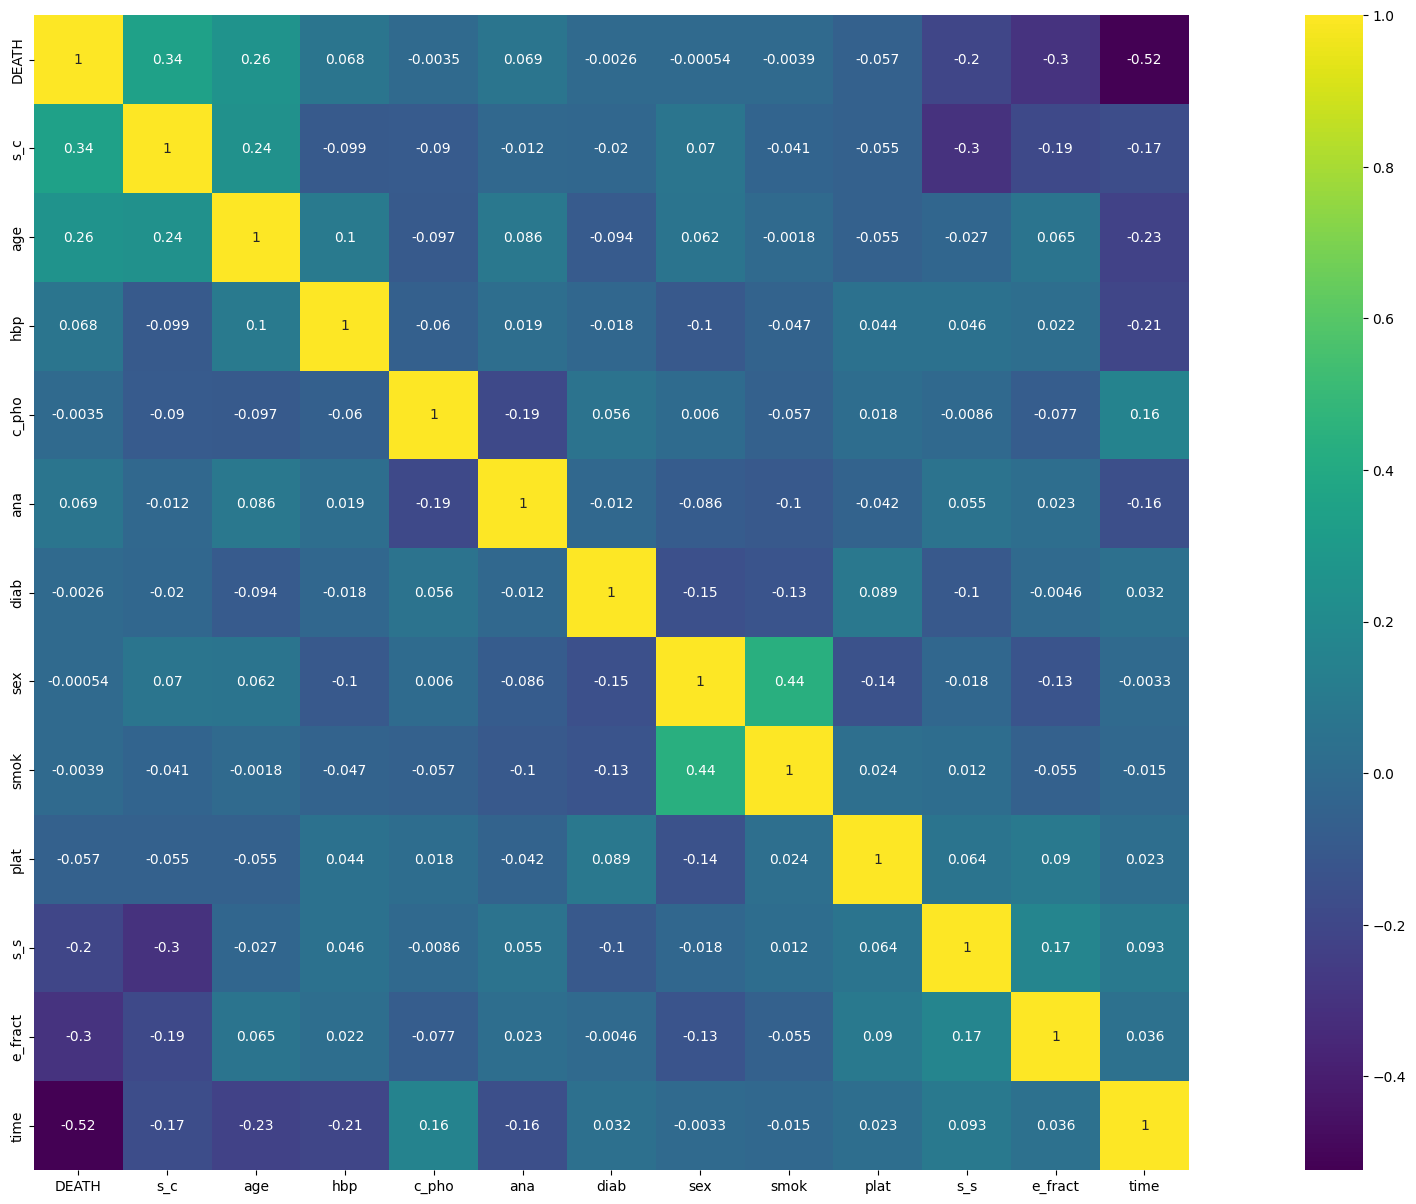

In [942]:
 
df=df[['DEATH', 's_c', 'age', 'hbp', 'c_pho', 'ana', 'diab', 'sex', 'smok',
       'plat', 's_s', 'e_fract', 'time']]
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(),annot=True,cmap='viridis', square=True)

some of the featueres are well corellared with each other and one of them can be selected to represent the model.<br>
dropping - sex, diab

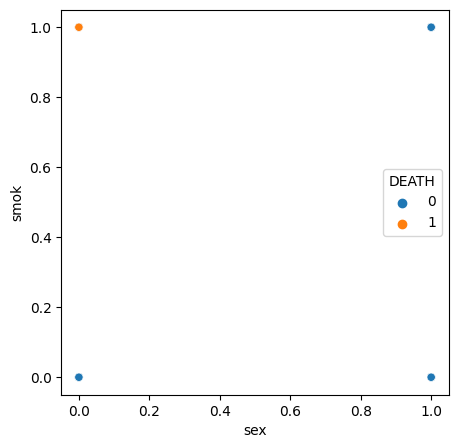

In [943]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x ='sex',y ='smok',hue='DEATH')
plt.show()

In [944]:
# df['hd_cons'] = df['hd'].map({0:0, 1:1, 2:1, 3:1, 4:1})

binning the continuous variable:

define new metrics (e.g., multiply columns together or create custom categories based on multiple variables) 

In [945]:
# df['var'] = df['var1']+df['var2']
# df['var'].diff(1)
# df['var']=df['var']-1

outlier verification : 

In [946]:
df.nunique()

DEATH        2
s_c         37
age         46
hbp          2
c_pho      199
ana          2
diab         2
sex          2
smok         2
plat       172
s_s         26
e_fract     16
time       147
dtype: int64

In [947]:
df.columns

Index(['DEATH', 's_c', 'age', 'hbp', 'c_pho', 'ana', 'diab', 'sex', 'smok',
       'plat', 's_s', 'e_fract', 'time'],
      dtype='object')

standardizaton & normalization :scaling

end o f data preprocessing 

-------------------------------------

setting up the model

In [948]:
df.columns

Index(['DEATH', 's_c', 'age', 'hbp', 'c_pho', 'ana', 'diab', 'sex', 'smok',
       'plat', 's_s', 'e_fract', 'time'],
      dtype='object')

In [949]:
x=df.drop('DEATH', axis=1)
y=df['DEATH']


In [950]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [951]:
# Transform the train and test data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [952]:
x_train.shape

(203, 12)

In [953]:
x_test.shape

(87, 12)

both have 6 columns each so the shape is good.

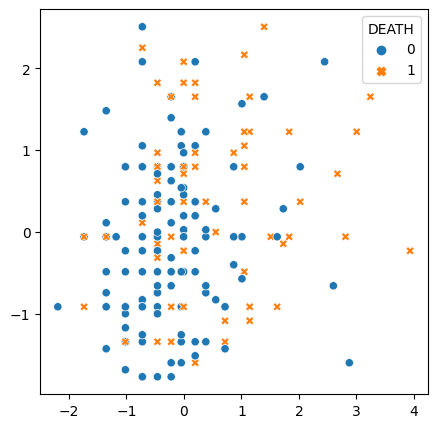

In [954]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = x_train[:,0],y = x_train[:,1],hue=y_train,style = y_train)
plt.show()
# Slicing  - all rows, first two high correlated feature columns & looking at y - binary output. 

the train data doesnt show any great clustering

### modelling 

Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem.


Logistic Regression, Naive Bayes, KNN, SVM, Decision Tree. 

In [955]:
# Model Selection
log = LogisticRegression()
#
nb = GaussianNB()
#
knn = KNeighborsClassifier(n_neighbors=7)
#
tree = DecisionTreeClassifier(random_state=123)
#
svc = SVC(kernel='linear', random_state=123,probability=True)
#
models = [log, nb, knn, tree, svc]

In [956]:
warnings.filterwarnings("ignore")

In [957]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)
tree.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=123)

Cross validation 

In [958]:
cv_scores = cross_val_score(log, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())


[0.9047619  0.66666667 0.85714286 0.8        0.85       0.85
 0.8        0.8        0.9        0.8       ]
0.822857142857143


In [959]:
cv_scores = cross_val_score(nb,  x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.85714286 0.66666667 0.85714286 0.8        0.85       0.9
 0.8        0.8        0.85       0.6       ]
0.798095238095238


In [960]:
cv_scores = cross_val_score(knn, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.85714286 0.66666667 0.80952381 0.85       0.75       0.9
 0.8        0.75       0.8        0.7       ]
0.7883333333333333


In [961]:
cv_scores = cross_val_score(tree, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.85714286 0.76190476 0.80952381 0.75       0.85       0.95
 0.7        0.85       0.8        0.75      ]
0.8078571428571429


In [962]:
cv_scores = cross_val_score(svc,  x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.9047619  0.71428571 0.85714286 0.8        0.85       0.85
 0.85       0.8        0.85       0.8       ]
0.8276190476190475


In [963]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict_proba(x_test)
yhat_tree = tree.predict_proba(x_test)
yhat_svc = svc.predict_proba(x_test)


In [964]:
y_pred_log = log.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_tree = tree.predict(x_test)
y_pred_svc = svc.predict(x_test)

In [965]:
fpr_log, tpr_log, thresholds_l = roc_curve(y_test, yhat_log[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_nb[:,1]) # * check again
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, yhat_tree[:,1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, yhat_svc[:,1])

In [966]:
metrics = pd.DataFrame(index = ['accuracy','precision', 'recall'], columns =['logisticReg','NaiveBayes','KNN','Tree','svc']   )

In [967]:
metrics.loc['accuracy','logisticReg'] = accuracy_score(y_pred=y_pred_log,y_true=y_test)
metrics.loc['precision','logisticReg'] = precision_score(y_pred=y_pred_log,y_true=y_test)
metrics.loc['recall','logisticReg'] = recall_score(y_pred=y_pred_log,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_log,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_log))

[[56  8]
 [ 8 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.65      0.65      0.65        23

    accuracy                           0.82        87
   macro avg       0.76      0.76      0.76        87
weighted avg       0.82      0.82      0.82        87



In [968]:
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_nb,y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_nb,y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_nb,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_nb,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_nb))

[[56  8]
 [ 8 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.65      0.65      0.65        23

    accuracy                           0.82        87
   macro avg       0.76      0.76      0.76        87
weighted avg       0.82      0.82      0.82        87



In [969]:
metrics.loc['accuracy','KNN'] = accuracy_score(y_pred=y_pred_knn,y_true=y_test)
metrics.loc['precision','KNN'] = precision_score(y_pred=y_pred_knn,y_true=y_test)
metrics.loc['recall','KNN'] = recall_score(y_pred=y_pred_knn,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_knn,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_knn))
# order of detail inputed is important. Since predictied and actual order can interchange the values of FP & FN.

[[59  5]
 [13 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        64
           1       0.67      0.43      0.53        23

    accuracy                           0.79        87
   macro avg       0.74      0.68      0.70        87
weighted avg       0.78      0.79      0.78        87



In [970]:
metrics.loc['accuracy','Tree'] = accuracy_score(y_pred=y_pred_tree,y_true=y_test)
metrics.loc['precision','Tree'] = precision_score(y_pred=y_pred_tree,y_true=y_test)
metrics.loc['recall','Tree'] = recall_score(y_pred=y_pred_tree,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_tree,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_tree))

[[56  8]
 [ 7 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.67      0.70      0.68        23

    accuracy                           0.83        87
   macro avg       0.78      0.79      0.78        87
weighted avg       0.83      0.83      0.83        87



In [971]:
metrics.loc['accuracy','svc'] = accuracy_score(y_pred=y_pred_svc,y_true=y_test)
metrics.loc['precision','svc'] = precision_score(y_pred=y_pred_svc,y_true=y_test)
metrics.loc['recall','svc'] = recall_score(y_pred=y_pred_svc,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_svc,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_svc))

[[55  9]
 [ 8 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        64
           1       0.62      0.65      0.64        23

    accuracy                           0.80        87
   macro avg       0.75      0.76      0.75        87
weighted avg       0.81      0.80      0.81        87



Evaluate each model using the evaluation techniques you have learned in class.


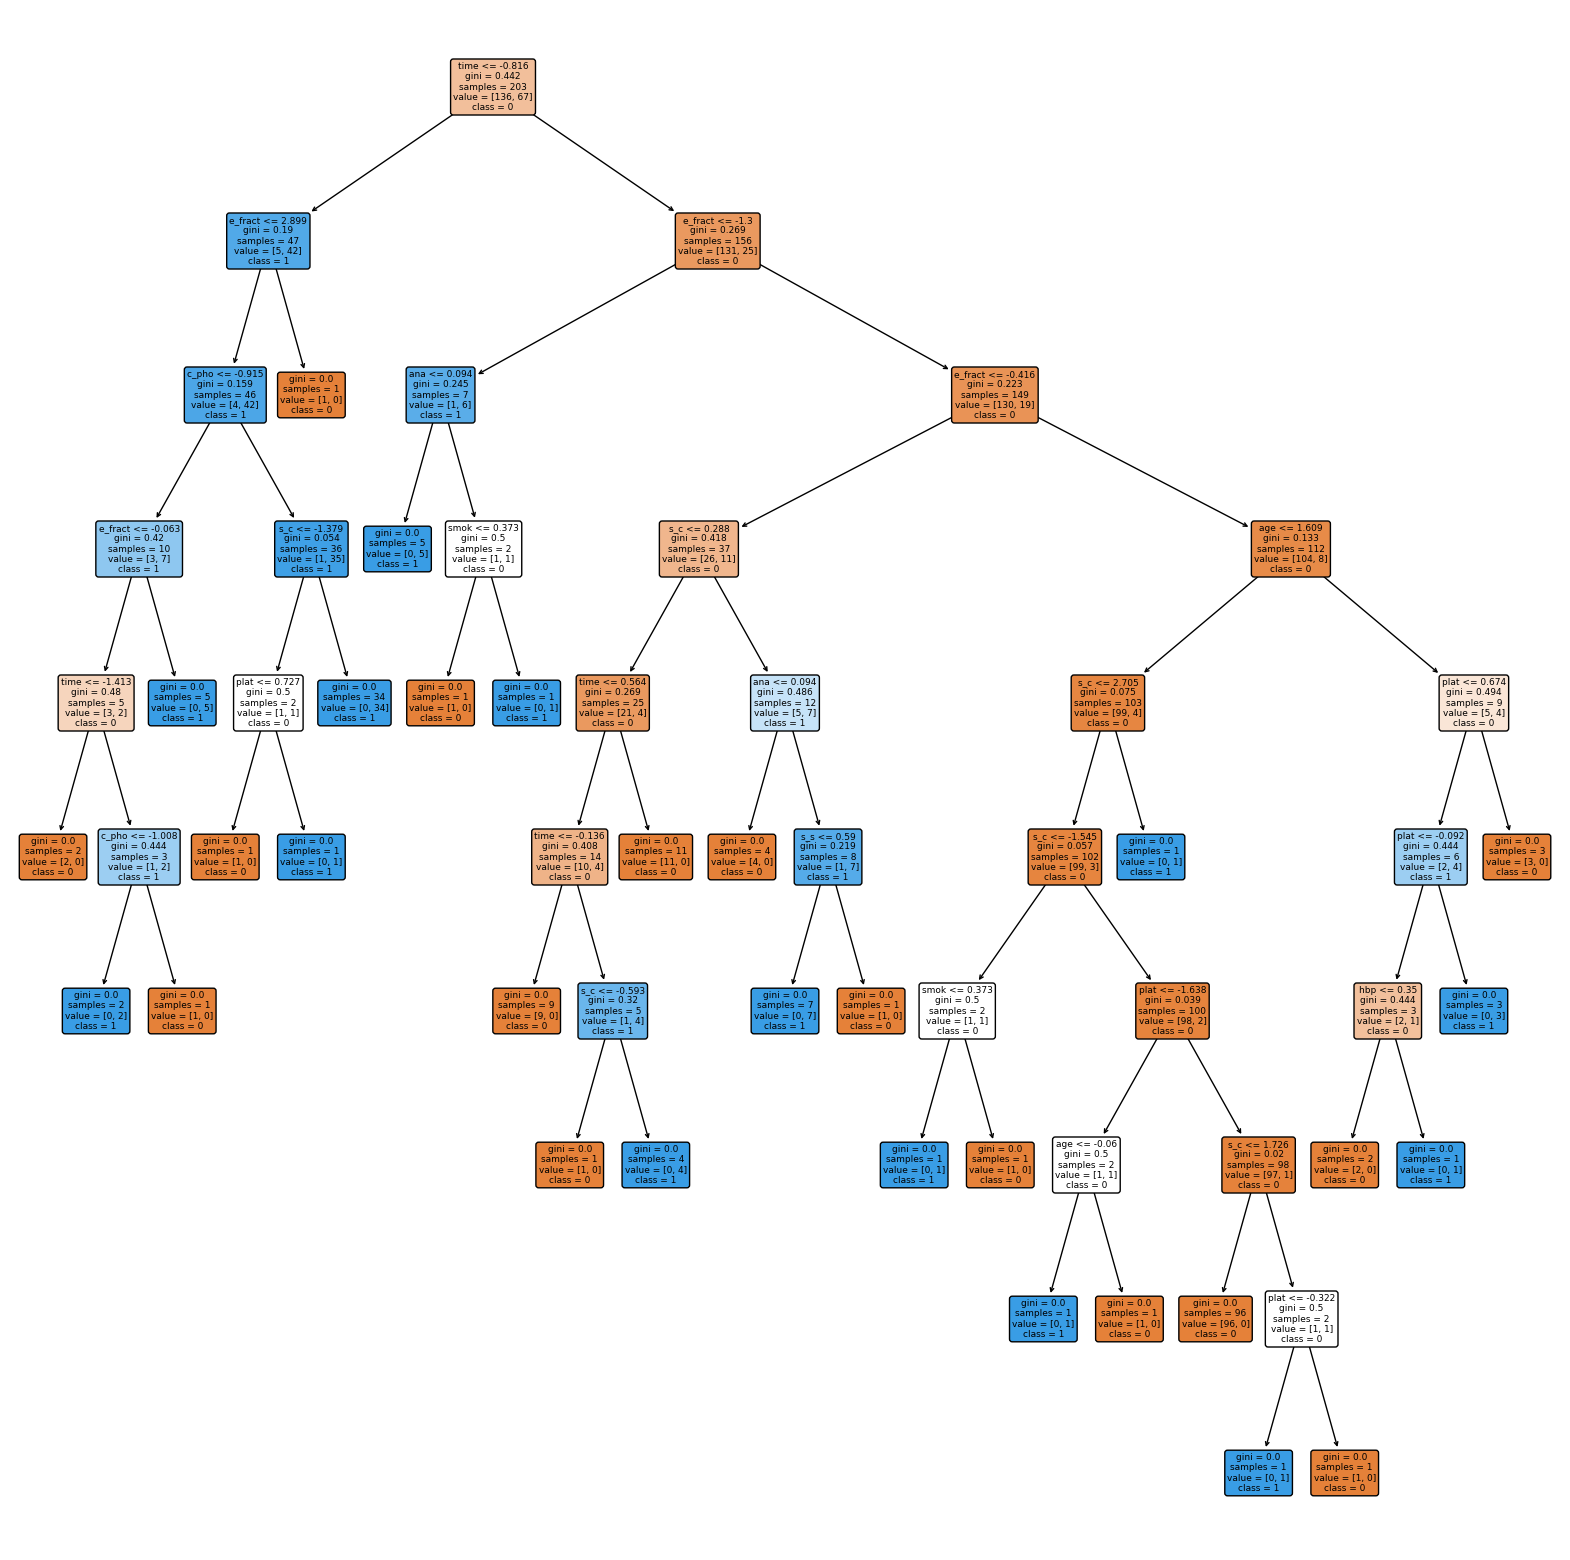

In [972]:
# plotting decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
feature_names = x.columns.tolist() 
plot_tree(tree, filled=True, rounded=True, feature_names=feature_names, class_names=['0', '1']);
plt.show()

some of the features have been adjusted based on decision tree outputs.

In [973]:
100*metrics

,logisticReg,NaiveBayes,KNN,Tree,svc
accuracy,81.609195,81.609195,79.310345,82.758621,80.45977
precision,65.217391,65.217391,66.666667,66.666667,62.5
recall,65.217391,65.217391,43.478261,69.565217,65.217391


ROC curve overlap

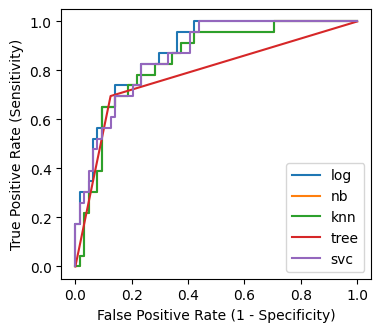

In [974]:
plt.figure(figsize=(4, 3.5))
plt.plot(fpr_log,tpr_log, label='log')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.plot(fpr_tree,tpr_tree, label='tree')
plt.plot(fpr_svc,tpr_svc, label='svc')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()

In [975]:
# auc scores
print('logistic_regression : ',auc(fpr_log,tpr_log))
print('NaiveBayes : ',auc(fpr_nb,tpr_nb))
print('KNN : ',auc(fpr_knn,tpr_knn))
print('Tree : ',auc(fpr_tree,tpr_tree))
print('Svc : ',auc(fpr_svc,tpr_svc))

logistic_regression :  0.8783967391304348
NaiveBayes :  0.8423913043478262
KNN :  0.8423913043478262
Tree :  0.7853260869565217
Svc :  0.8648097826086957


logistec is best . DOing hyper parameter tuning based off it.

In [976]:
param_grid = {'C': [0.01, 0.1, 1, 10],'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
randomsearch = RandomizedSearchCV(model, param_grid, cv=10, n_iter=100, scoring='accuracy')

grid_search.fit(x_train, y_train)
randomsearch.fit(x_train, y_train)
print("Best Hyperparameters grid:", grid_search.best_params_)
print("Best Hyperparameters Random:", randomsearch.best_params_)



Best Hyperparameters grid: {'C': 0.1, 'solver': 'lbfgs'}
Best Hyperparameters Random: {'solver': 'lbfgs', 'C': 0.1}


from both considering random: <br>
Best Hyperparameters Random: {'solver': 'lbfgs', 'C': 0.1}<br>

applying the best Hyperparameters:Modle optimization

In [977]:
best_model = LogisticRegression(**randomsearch.best_params_)
cv_scores = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
best_model.fit(x_train, y_train)
# Predict
y_hat_best = best_model.predict_proba(x_test)
y_pred_best = best_model.predict(x_test)

add some details of the output


* Check performance metrics: precision, recall, F1 score, roc_auc, accuracy score 
* If your model isn't performing well, try adding/removing variables, or engineering more features 
* Once you're confident you have tried everything possible to build the best possible model, you can finalize your model 

In [978]:
print(confusion_matrix(y_pred=y_pred_best, y_true=y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

[[57  7]
 [ 9 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.67      0.61      0.64        23

    accuracy                           0.82        87
   macro avg       0.77      0.75      0.76        87
weighted avg       0.81      0.82      0.81        87



7. Explaining your results 
* Explain your results by always connecting your decisions to the business problem provided. 
* Explain your process > how did you decide to clean the data? how do you know that was the best decision? what did you learn from exploratory analysis, and how did this inform your modelling decisions? Which features did you engineer? how did you pick these?  
* Explain the final model > which variables were included in the model, and what was the model performance? 
* Explain how this model can be applied to the future to predict outcomes > how will the business use the model? 

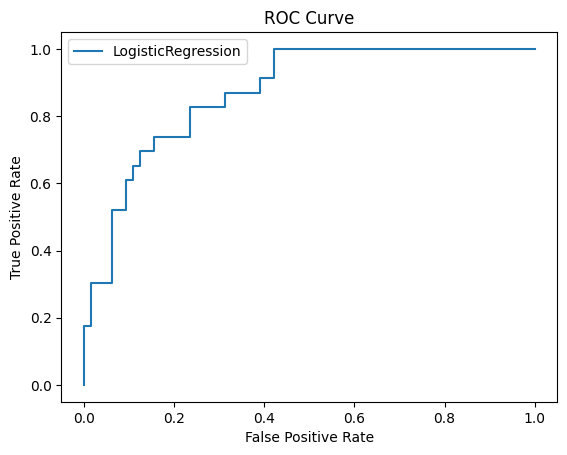

In [979]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label=best_model.__class__.__name__)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

e. Explain your model to a business executive. Your explanation should include the following:

i. Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.

ii. Your approach for building and evaluating the model. 

iii. The final model you selected and how you know this is the best model for the problem.

iv. How the model should be used by the business, in business process.

did you refer notes ? 


fir , trankssform, fit transform.
closing a model prediction. how to finsih the mdoel.
model deplyment.
confirmatory data analysis ?